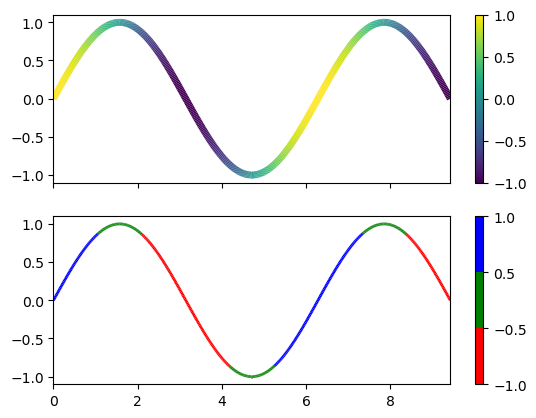

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
%matplotlib inline
x = np.linspace(0, 3 * np.pi, 500)
y = np.sin(x)
dydx = np.cos(x)  # first derivative

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
lc.set_linewidth(5)
line = axs[0].add_collection(lc)
fig.colorbar(line, ax=axs[0])

# Use a boundary norm instead
cmap = ListedColormap(['r', 'g', 'b'])
norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[1].add_collection(lc)
fig.colorbar(line, ax=axs[1])

axs[0].set_xlim(x.min(), x.max())
axs[0].set_ylim(-1.1, 1.1)
plt.show()

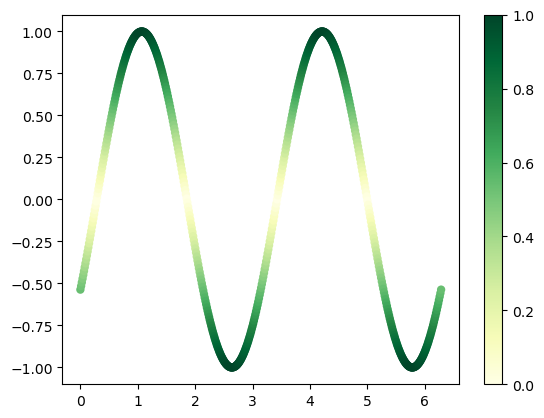

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
ax= plt.figure()
x = np.linspace(0, 2*np.pi, 500)
y = np.sin(2*x+12)
points = plt.scatter(x,y, c=cm.get_cmap('YlGn')(np.abs(y)), edgecolor='none')
plt.colorbar(cm.ScalarMappable(cmap=cm.get_cmap('YlGn')))
plt.show()

10000 10000 1000


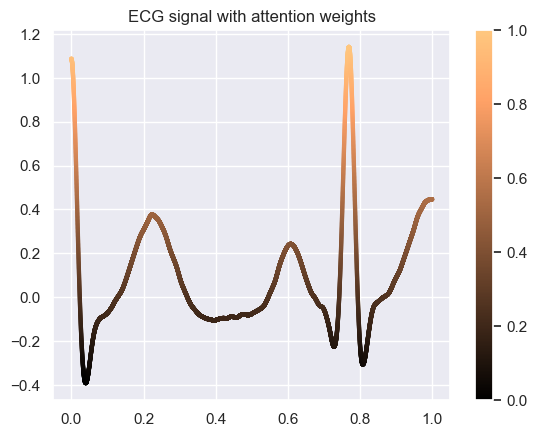

In [56]:

import neurokit2 as nk
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
sns.set()

def vis_colored_lines(input_arr, color_arr, orig_sampling_rate, desired_sampling_rate=5000, 
                      scatter_size = 10,
                      rescale_color=False, x_axis_max=None, title=None, 
                      color_map='copper',ax=None):
    """
    Visualize a 1D signal with a color gradient.
    :param input_arr: array
        The input signal.
    :param color_arr: array
        The color signal.
    :param orig_sampling_rate: int
        The original sampling rate of the input signal.
    :param desired_sampling_rate: int
        The desired sampling rate of the input signal.
    :param scatter_size: int
        The size of the scatter plot.
    :param rescale_color: bool
        If True, rescale the color array.
    :param x_axis_max: int
        The maximum value of the x-axis.
    :param title: str
        The title of the plot.
    :param color_map: str
        The color map to use.
    :param ax: matplotlib axis
        The axis to plot on.
    :return: matplotlib axis
        The axis on which the plot was drawn.
    """

    if orig_sampling_rate < desired_sampling_rate:    
    # Resample the signal
        input_array = nk.signal_resample(input_arr, sampling_rate=orig_sampling_rate, desired_sampling_rate=desired_sampling_rate, method='interpolation')
        color_array = nk.signal_resample(color_arr, sampling_rate=orig_sampling_rate, desired_sampling_rate=desired_sampling_rate, method='interpolation')
    
    else:
        input_array = input_arr
        color_array = color_arr
    assert len(input_array) == len(color_array), "The length of the input array and the color array should be the same."
         # Preprocess ECG signal
    x_axis_max  =1 if x_axis_max is None else x_axis_max
    x = np.linspace(0,x_axis_max, input_array.shape[0])
    ## resclae
    if rescale_color:
        color_array = (color_array - np.min(color_array)) / (np.max(color_array) - np.min(color_array))
    else:
        color_array = color_array
    print(len(x), len(input_array), len(input_arr))
    if ax is None:
        fig, ax = plt.subplots()
        points = plt.scatter(x, input_array, c=cm.get_cmap(color_map)(color_array), edgecolor='none', s=scatter_size)
    else:
        points = ax.scatter(x, input_array, c=cm.get_cmap(color_map)(color_array), edgecolor='none', s=scatter_size)
    plt.colorbar(cm.ScalarMappable(cmap=cm.get_cmap(color_map)))
    
    if ax is None: 
        plt.title(title)
    else: 
        ax.set_title(title)
    return ax


# Example usage
orig_sampling_rate = 1000
desired_sampling_rate = 10000
fig, ax = plt.subplots()
test_sample = nk.ecg_simulate(duration=1, noise=0.01, heart_rate=80, random_state=42, sampling_rate=orig_sampling_rate)
preprocessed_ecg = vis_colored_lines(test_sample, test_sample/2.5,orig_sampling_rate,rescale_color=True,
                                     desired_sampling_rate=desired_sampling_rate,ax=ax,color_map='copper',scatter_size=10,
                                     title='ECG signal with attention weights')


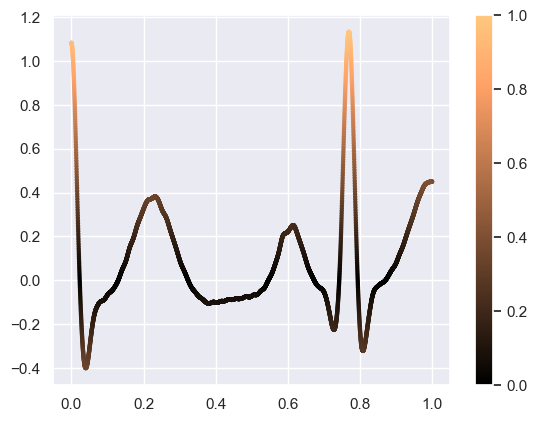

In [25]:
def preprocess_ecg(test_sample,color_arrays, sampling_rate,desired_sampling_rate=5000):    
    # Resample the signal
    resampled_ecg = nk.signal_resample(test_sample, sampling_rate=sampling_rate, desired_sampling_rate=desired_sampling_rate, method='interpolation')
    resampled_color = nk.signal_resample(color_arrays, sampling_rate=sampling_rate, desired_sampling_rate=desired_sampling_rate, method='interpolation')
    # Preprocess ECG signal
    x = np.linspace(0, 1, resampled_ecg.shape[0])
    y = np.abs(resampled_color)

    norm_y = (y - np.min(y)) / (np.max(y) - np.min(y))
    
    # Plot the ECG signal
    points = plt.scatter(x, resampled_ecg, c=cm.get_cmap('copper')(norm_y), edgecolor='none', s=10)
    plt.colorbar(cm.ScalarMappable(cmap=cm.get_cmap('copper')))
    return resampled_ecg,resampled_color

# Example usage
desired_sampling_rate = 5000
test_sample = nk.ecg_simulate(duration=1, sampling_rate=1000, heart_rate=80)
color_arrays = np.random.rand(50)
## resample array using scipy
import scipy.signal
resampled_ecg = scipy.signal.resample(test_sample, test_sample.shape[0])
preprocessed_ecg = preprocess_ecg(test_sample, resampled_ecg, 1000,desired_sampling_rate)